In [17]:
!pip install ultralytics

In [18]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [19]:
from ultralytics import YOLO
from IPython.display import Image

In [22]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oJnoytRUIZGaNnks5Zn2")
project = rf.workspace("midstem").project("road-signs-vanga")
version = project.version(21)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-signs-21 in yolov8:: 100%|██████████| 9698/9698 [00:02<00:00, 4764.36it/s]


In [23]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Road-signs-21/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Road-signs-21/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

In [24]:
!yolo task=detect mode=predict model=/content/runs/detect/train7/weights/best.pt conf=0.25 source=/content/Road-signs-21/test/images

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,187,504 parameters, 0 gradients, 28.8 GFLOPs

image 1/114 /content/Road-signs-21/test/images/-1-_jpg.rf.907e1fe4e1d8eb6a391455c5370cae75.jpg: 640x640 1 I-21, 16.6ms
image 2/114 /content/Road-signs-21/test/images/-2023-10-13-142354_png.rf.cc95a61673f59931fc973e39f783951f.jpg: 640x640 1 III-85-2, 16.7ms
image 3/114 /content/Road-signs-21/test/images/-2023-10-13-142728_png.rf.210c4e445a3684a79694e0cfb0b6960a.jpg: 640x640 (no detections), 16.6ms
image 4/114 /content/Road-signs-21/test/images/-2023-10-19-154153_png.rf.13c359b981223508127617a62b22ed85.jpg: 640x640 1 III-6, 16.6ms
image 5/114 /content/Road-signs-21/test/images/-2023-10-19-154239_png.rf.e88ed9664a828512a8277e81ab1e70e9.jpg: 640x640 1 I-25, 1 III-85-2, 16.6ms
image 6/114 /content/Road-signs-21/test/images/-2023-10-19-154931_png.rf.9444259ade0f28842230523d7c08f98a.jpg: 640x640 1 III-13, 1 III-13.1, 1 III-84, 16

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

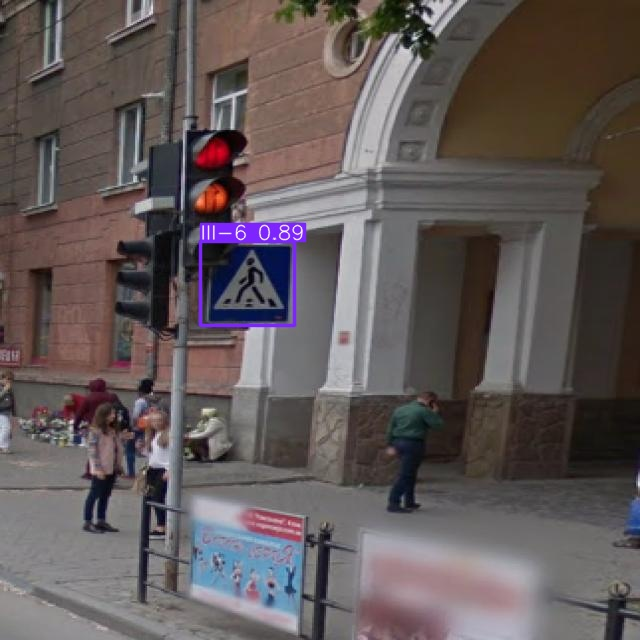

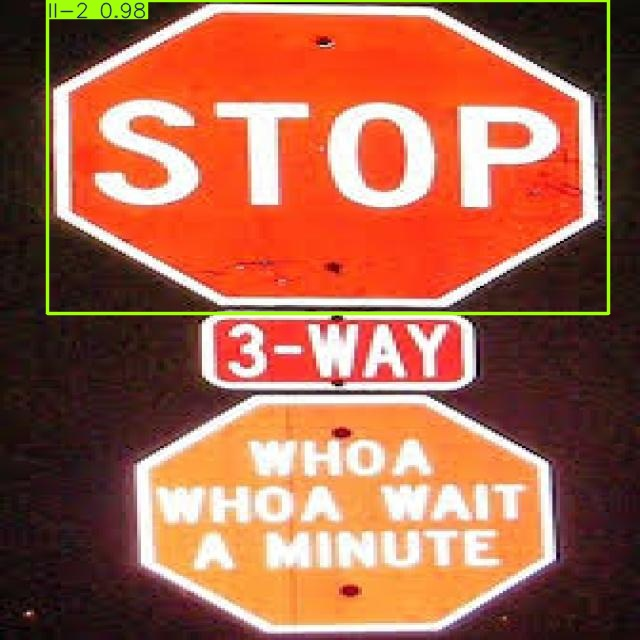

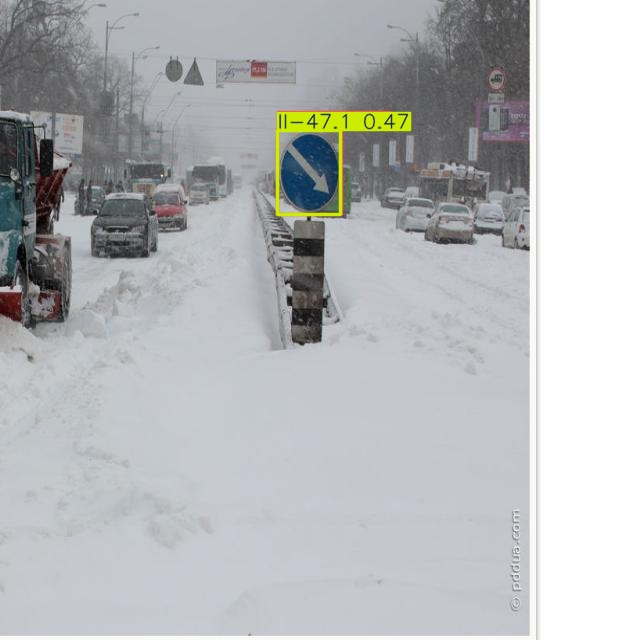

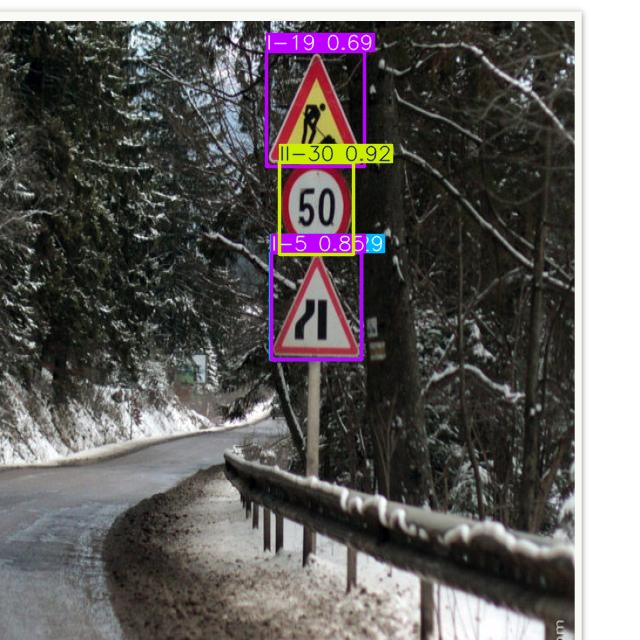

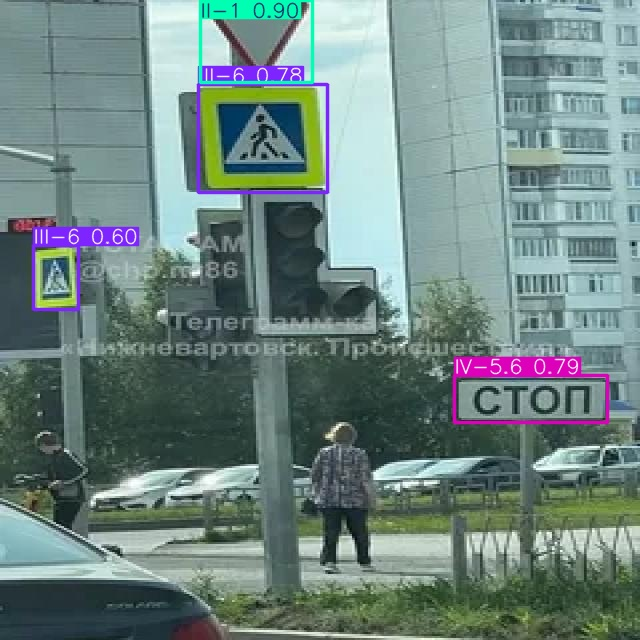

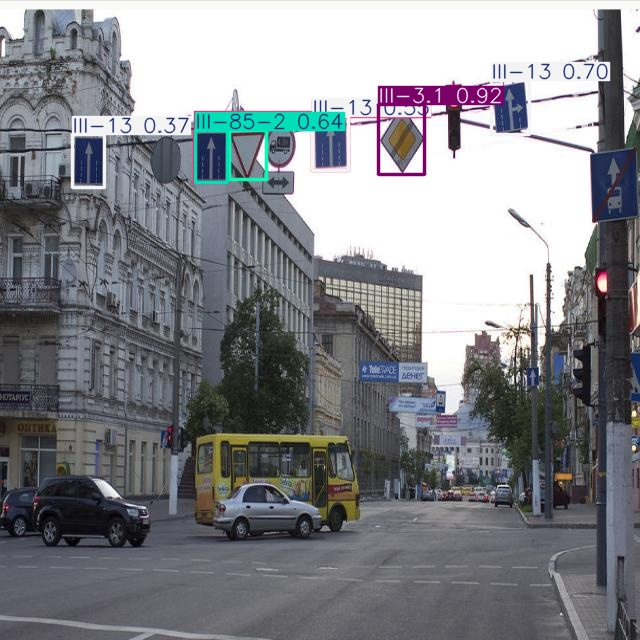

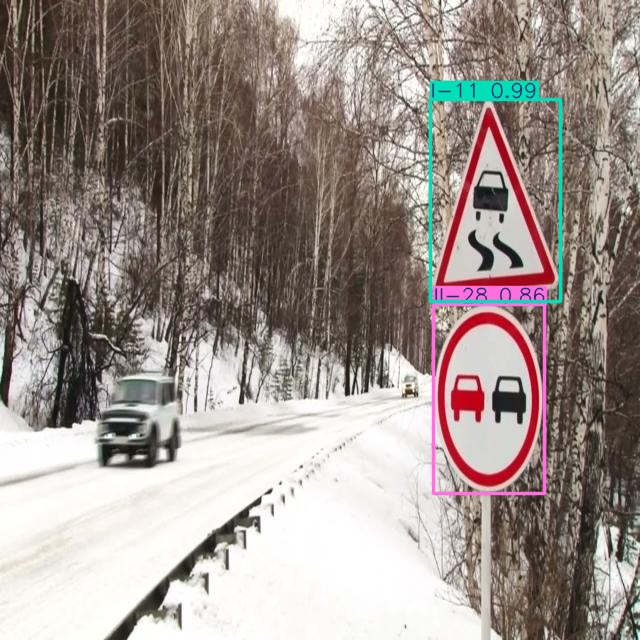

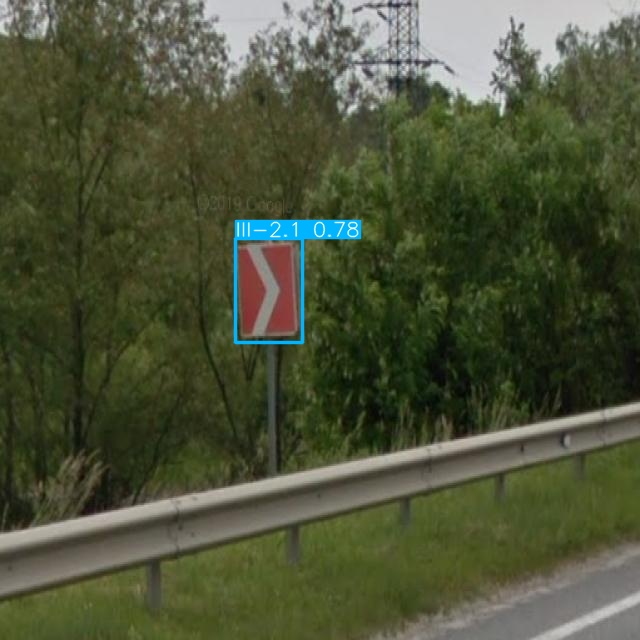

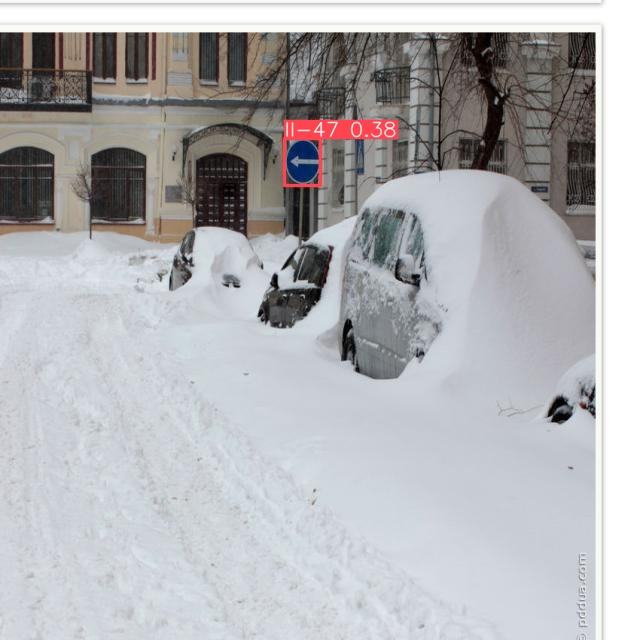

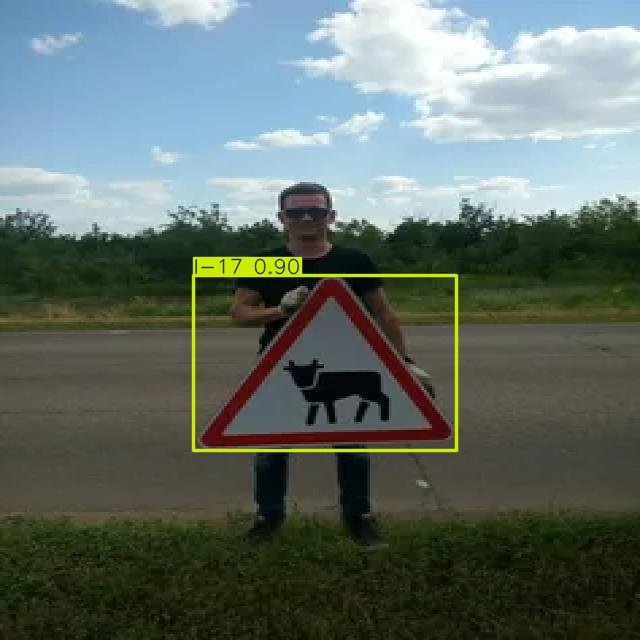

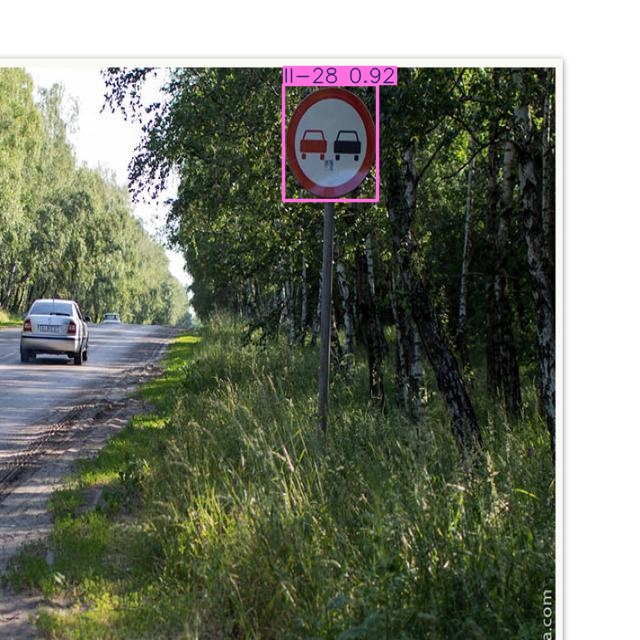

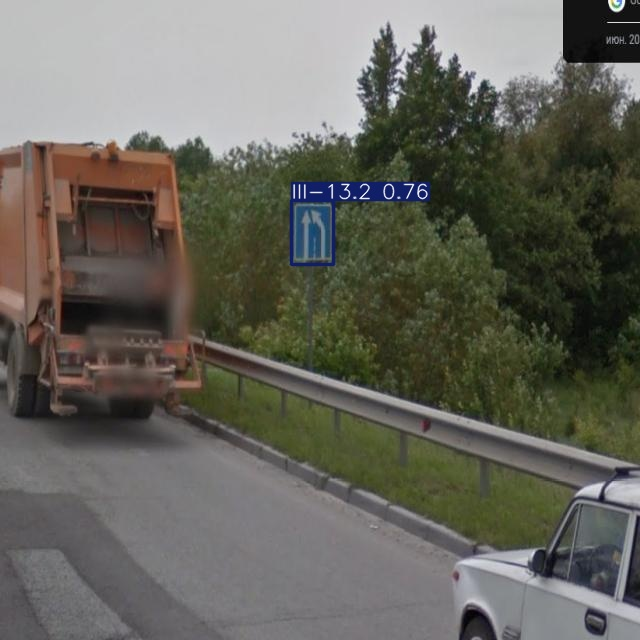

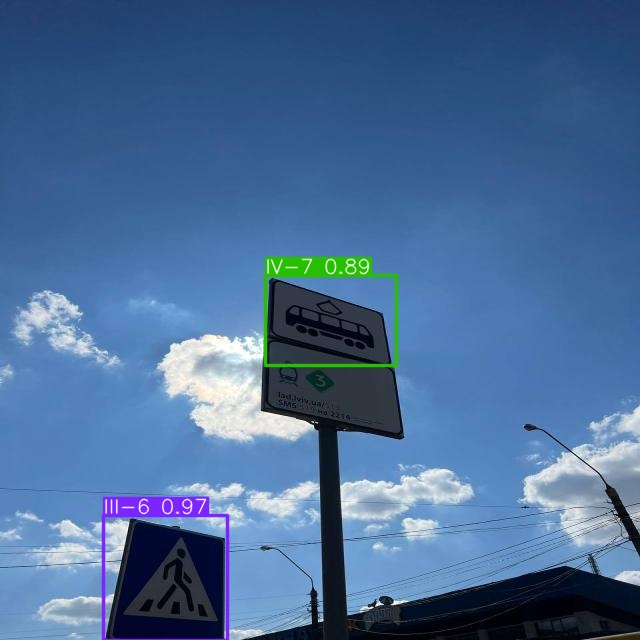

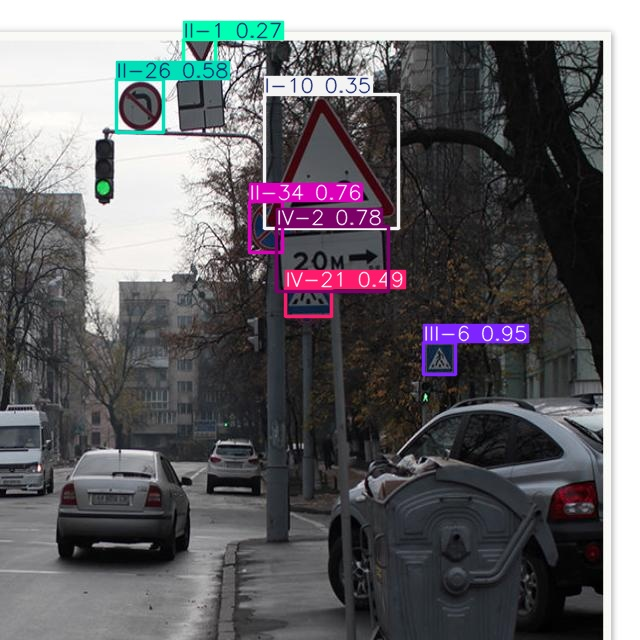

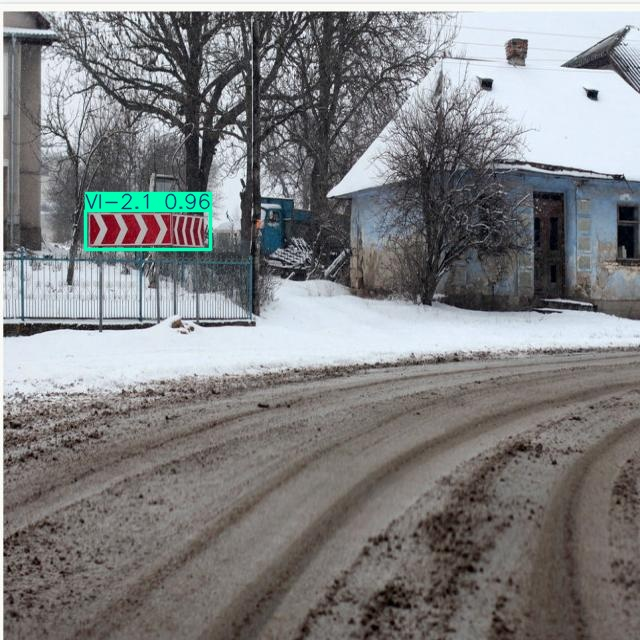

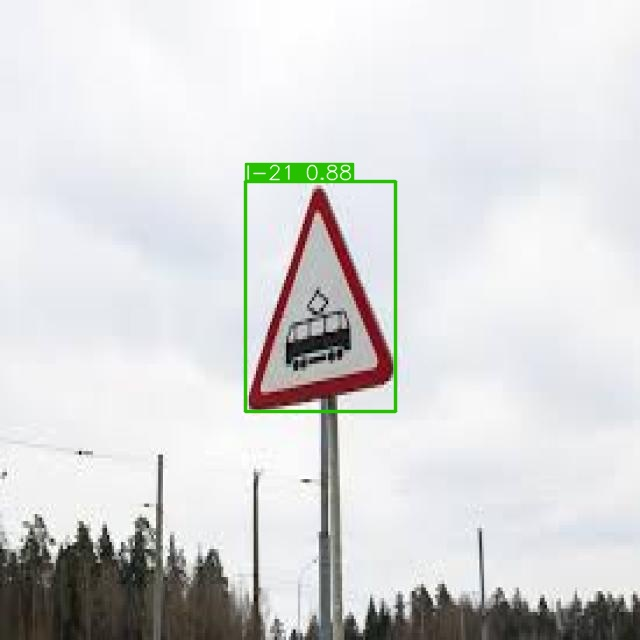

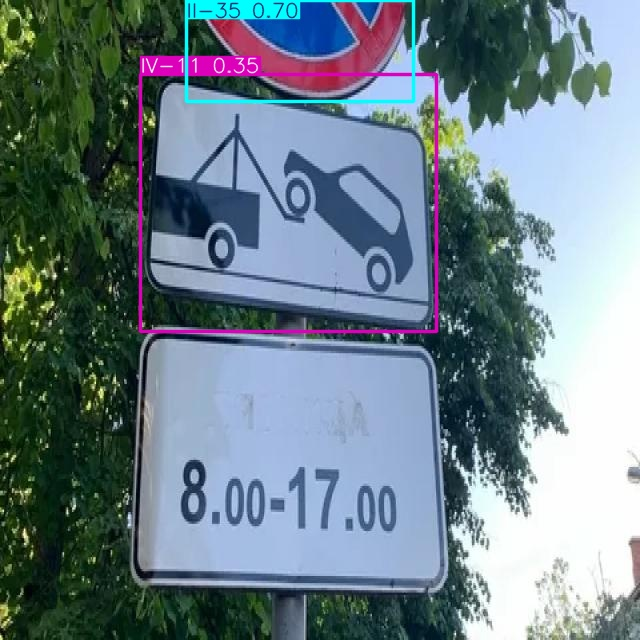

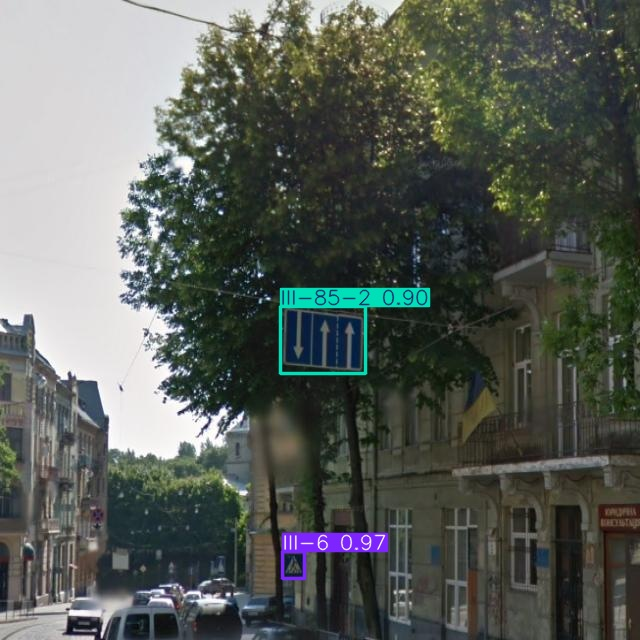

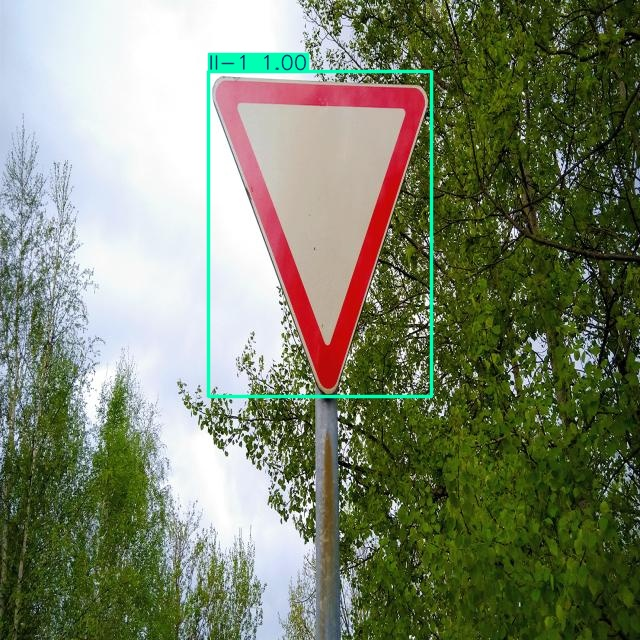

In [28]:
res=max(glob.glob('/content/runs/detect/predict'),key=os.path.getmtime)
for img in glob.glob(f'{res}/*.jpg')[1:20]:
  display(IPyImage(filename=img,width=600))
  print("\n")